In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

DATA_PATH = 'det_score.txt'

In [22]:
gt_label = list()
predict_score = list()

In [23]:
with open(DATA_PATH, 'r') as f:
    while True:
        line = f.readline()
        if not line:
            break
        gt, pred = line.split()
        gt_label.append(float(gt))
        predict_score.append(float(pred))

In [24]:
gt_label.count(0), gt_label.count(1), len(gt_label)


(2660, 2664, 5324)

In [25]:
df = pd.DataFrame({'ground_truth': gt_label,
                   'predict_score': predict_score})
df

,ground_truth,predict_score
0,1.0,0.962322
1,1.0,0.999983
2,1.0,0.999371
3,1.0,1.000000
4,1.0,1.000000
...,...,...
5319,0.0,0.348923
5320,0.0,0.314481
5321,0.0,0.712375
5322,0.0,0.216610


In [26]:
df = df.round(6)
df.groupby(['predict_score']).count()

,ground_truth
predict_score,
0.180655,1
0.182939,1
0.198054,1
0.200090,1
0.202901,1
...,...
0.999996,23
0.999997,26
0.999998,34


In [27]:
df_good = df[df['ground_truth'] == 0]
df_bad = df[df['ground_truth'] == 1]

In [28]:
df_bad.groupby(['predict_score']).count()

,ground_truth
predict_score,
0.661588,1
0.898336,1
0.907307,1
0.907438,1
0.909323,1
...,...
0.999996,22
0.999997,26
0.999998,33


In [29]:
df_good.groupby(['predict_score']).count()


,ground_truth
predict_score,
0.180655,1
0.182939,1
0.198054,1
0.200090,1
0.202901,1
...,...
0.999989,1
0.999995,2
0.999996,1


In [30]:
df_bad.describe()

,ground_truth,predict_score
count,2664.0,2664.000000
mean,1.0,0.998150
std,0.0,0.010040
min,1.0,0.661588
25%,1.0,0.999973
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,1.000000


In [31]:
df_good.describe()

,ground_truth,predict_score
count,2660.0,2660.000000
mean,0.0,0.418424
std,0.0,0.168127
min,0.0,0.180655
25%,0.0,0.308152
50%,0.0,0.364268
75%,0.0,0.470551
max,0.0,1.000000


In [32]:
df_hist = df_bad.merge(df_good['predict_score'])
df_hist

,ground_truth,predict_score
0,1.0,1.000000
1,1.0,1.000000
2,1.0,1.000000
3,1.0,1.000000
4,1.0,1.000000
...,...,...
1797,1.0,0.999954
1798,1.0,0.999954
1799,1.0,0.999961
1800,1.0,0.999961


In [33]:
f1 = f1_score(gt_label, predict_score)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

C:\Users\piai\AppData\Local\Temp\ipykernel_6816\2673875976.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['ground_truth'] == 0]['predict_score'], label='Ground Truth 0', shade=True)
C:\Users\piai\anaconda3\envs\msflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\piai\anaconda3\envs\msflow_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\piai\AppData\Local\Temp\ipykernel_6816\2673875976.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`

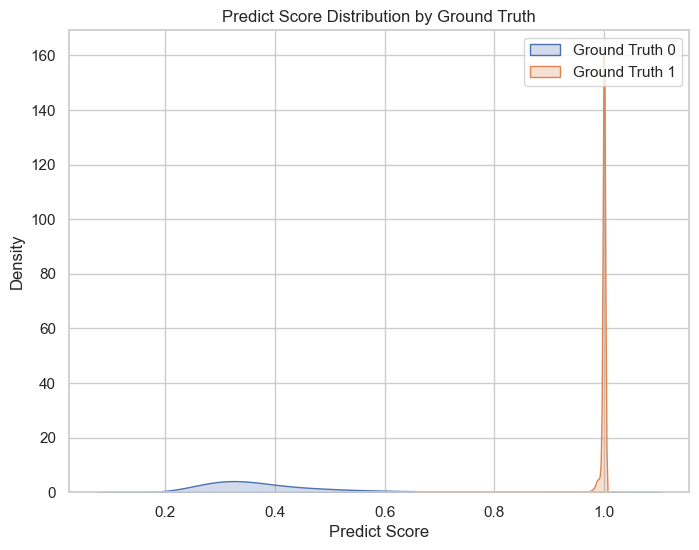

In [34]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# 각 ground_truth에 대한 predict_score 분포 그래프 그리기
sns.kdeplot(data=df[df['ground_truth'] == 0]['predict_score'], label='Ground Truth 0', shade=True)
sns.kdeplot(data=df[df['ground_truth'] == 1]['predict_score'], label='Ground Truth 1', shade=True)

# 그래프 설정
plt.xlabel('Predict Score')
plt.ylabel('Density')
plt.title('Predict Score Distribution by Ground Truth')
plt.legend()

# 그래프 표시
plt.show()

In [44]:
threshold_list = list()

In [45]:
scale_pool = [10**i for i in range(2,7)]
for scale in scale_pool:
    for val in range(9*(scale//10),scale):
        threshold = val/scale 
        predict_label = [1 if score > threshold else 0 for score in predict_score]
        f1 = f1_score(gt_label,predict_label)
        threshold_list.append((threshold,f1))
        # print(f'threshold = {threshold}\tf1_score = {f1}')

In [46]:
threshold_list.sort(key=lambda x:x[1],reverse=True)

In [47]:
threshold_list[:10]

[(0.925, 0.9855180096546602),
 (0.9241, 0.9855180096546602),
 (0.9242, 0.9855180096546602),
 (0.9243, 0.9855180096546602),
 (0.9244, 0.9855180096546602),
 (0.9245, 0.9855180096546602),
 (0.9246, 0.9855180096546602),
 (0.9247, 0.9855180096546602),
 (0.9248, 0.9855180096546602),
 (0.9249, 0.9855180096546602)]

In [48]:
len(threshold_list)

111110

In [51]:
df_threshold = pd.DataFrame(threshold_list,columns=["threshold","f1_score"])
df_threshold

,threshold,f1_score
0,0.925000,0.985518
1,0.924100,0.985518
2,0.924200,0.985518
3,0.924300,0.985518
4,0.924400,0.985518
...,...,...
111105,0.999995,0.822517
111106,0.999996,0.818081
111107,0.999997,0.811943
111108,0.999998,0.804665


<Axes: >

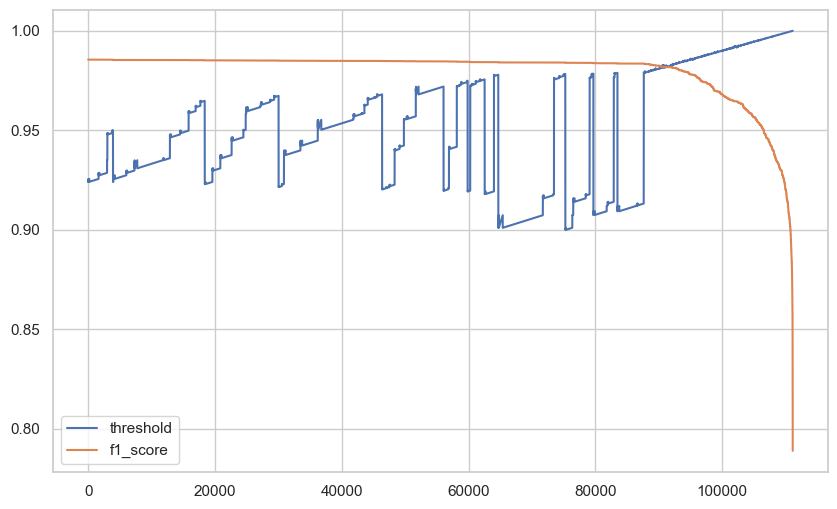

In [52]:
df_threshold.plot()

<Axes: >

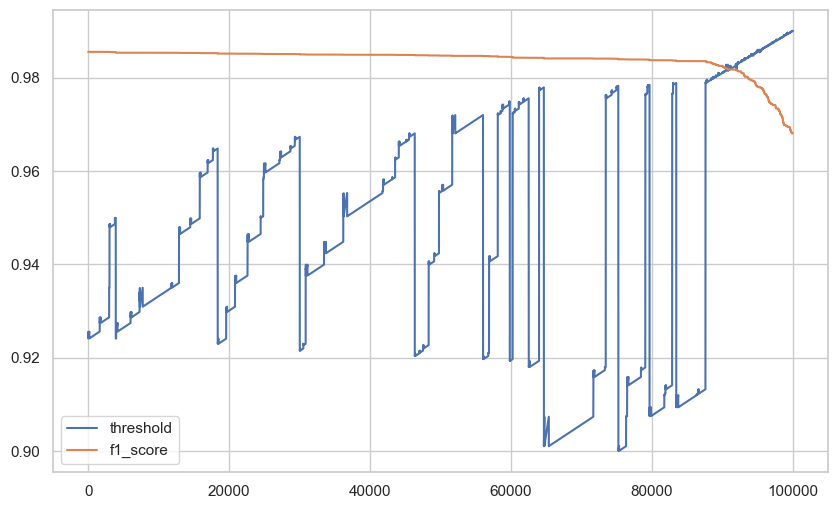

In [54]:
df_threshold.iloc[:100000].plot()

<Axes: >

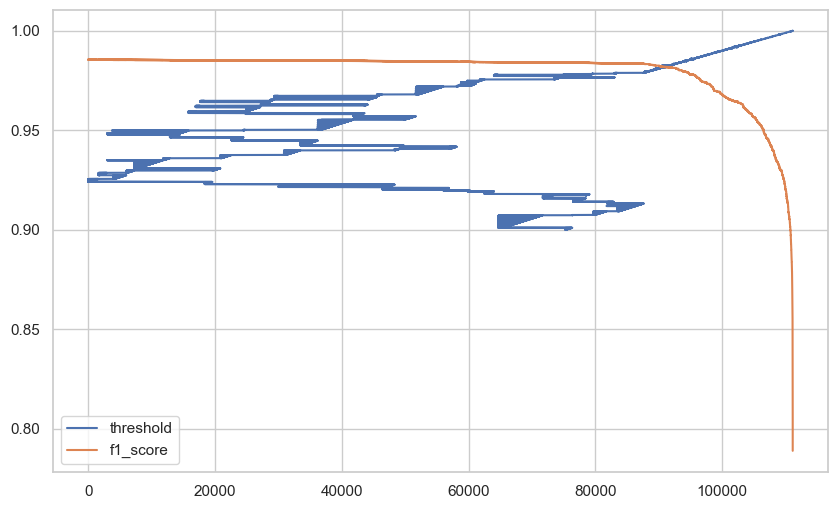

In [57]:
df_threshold.sort_values('threshold').plot()

In [62]:
df_threshold.groupby('f1_score').count()

,threshold
f1_score,
0.788912,1
0.804665,1
0.811943,1
0.818081,1
0.822517,1
...,...
0.985469,123
0.985475,768
0.985502,46


In [64]:
df_threshold.to_csv('score.csv')